# Feature Selection

https://machinelearningmastery.com/feature-selection-with-categorical-data/

Tutorial Overview

This tutorial is divided into three parts; they are:

1. Breast Cancer Categorical Dataset
    - Categorical Feature Selection
    - Chi-Squared Feature Selection
2. Mutual Information Feature Selection
3. Modeling With Selected Features
    - Model Built Using All Features
    - Model Built Using Chi-Squared Features
    - Model Built Using Mutual Information Features

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [2]:
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y

In [3]:
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [4]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


Now that we are familiar with the dataset, let’s look at how we can encode it for modeling.

We can use the OrdinalEncoder() from scikit-learn to encode each variable to integers. This is a flexible class and does allow the order of the categories to be specified as arguments if any such order is known.

Note: I will leave it as an exercise to you to update the example below to try specifying the order for those variables that have a natural ordering and see if it has an impact on model performance.

The best practice when encoding variables is to fit the encoding on the training dataset, then apply it to the train and test datasets.

The function below named prepare_inputs() takes the input data for the train and test sets and encodes it using an ordinal encoding.

In [5]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

We also need to prepare the target variable.

It is a binary classification problem, so we need to map the two class labels to 0 and 1. This is a type of ordinal encoding, and scikit-learn provides the LabelEncoder class specifically designed for this purpose. We could just as easily use the OrdinalEncoder and achieve the same result, although the LabelEncoder is designed for encoding a single variable.

The prepare_targets() function integer encodes the output data for the train and test sets.

In [6]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

We can call these functions to prepare our data.

In [7]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

## Categorical Feature Selection

There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.

 - Chi-Squared Statistic.
 - Mutual Information Statistic.

## Chi-Squared Feature Selection

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.

The scikit-learn machine library provides an implementation of the chi-squared test in the chi2() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

For example, we can define the SelectKBest class to use the chi2() function and select all features, then transform the train and test sets.

In [8]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


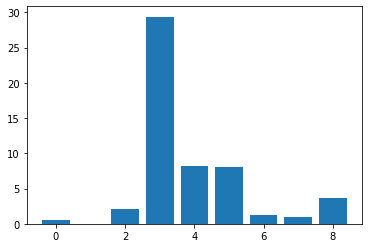

In [9]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In this case, we can see the scores are small and it is hard to get an idea from the number alone as to which features are more relevant.

Perhaps features 3, 4, 5, and 8 are most relevant.

This clearly shows that feature 3 might be the most relevant (according to chi-squared) and that perhaps four of the nine input features are the most relevant.

We could set k=4 When configuring the SelectKBest to select these top four features.

## Mutual Information Feature Selection

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the mutual_info_classif() function.

Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).

In [10]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.077700
Feature 3: 0.057197
Feature 4: 0.011755
Feature 5: 0.062190
Feature 6: 0.000000
Feature 7: 0.045384
Feature 8: 0.008443


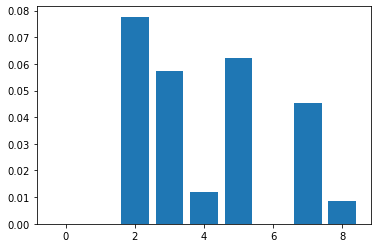

In [11]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

A bar chart of the feature importance scores for each input feature is created.

Importantly, a different mixture of features is promoted.

Now that we know how to perform feature selection on categorical data for a classification predictive modeling problem, we can try developing a model using the selected features and compare the results.

## Modeling With Selected Features

There are many different techniques for scoring features and selecting features based on scores; how do you know which one to use?

A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

In this section, we will evaluate a Logistic Regression model with all features compared to a model built from features selected by chi-squared and those features selected via mutual information.

Logistic regression is a good model for testing feature selection methods as it can perform better if irrelevant features are removed from the model.

## Model Built Using All Features

As a first step, we will evaluate a LogisticRegression model using all the available features.

The model is fit on the training dataset and evaluated on the test dataset.

The complete example is listed below.

In [12]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


## Model Built Using Chi-Squared Features

We can use the chi-squared test to score the features and select the four most relevant features.

The select_features() function below is updated to achieve this.

In [13]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [14]:
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


In this case, we see that the model achieved an accuracy of about 74%, a slight drop in performance.

It is possible that some of the features removed are, in fact, adding value directly or in concert with the selected features.

At this stage, we would probably prefer to use all of the input features.

## Model Built Using Mutual Information Features

We can repeat the experiment and select the top four features using a mutual information statistic.

The updated version of the select_features() function to achieve this is listed below.

In [15]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [16]:
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79
